<a href="https://colab.research.google.com/github/danielmancovidales/Aplicaciones-en-finanzas/blob/main/seleccion_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [2]:
# Lectura de base de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/analitica3/Financiera/df_final2.csv')
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30832 entries, 0 to 30831
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   eventos                              30832 non-null  int64  
 1   valor_pagado                         30832 non-null  float64
 2   cancer                               30832 non-null  int64  
 3   epoc                                 30832 non-null  int64  
 4   diabetes                             30832 non-null  int64  
 5   hipertension                         30832 non-null  int64  
 6   enf_cardiovascular                   30832 non-null  int64  
 7   genero                               30832 non-null  int64  
 8   edad                                 30832 non-null  int64  
 9   cantidad_enfermedades                30832 non-null  int64  
 10  clasifica_diagn_enf_apar_cir         30832 non-null  bool   
 11  clasifica_diagn_enf_apar_res

<Axes: >

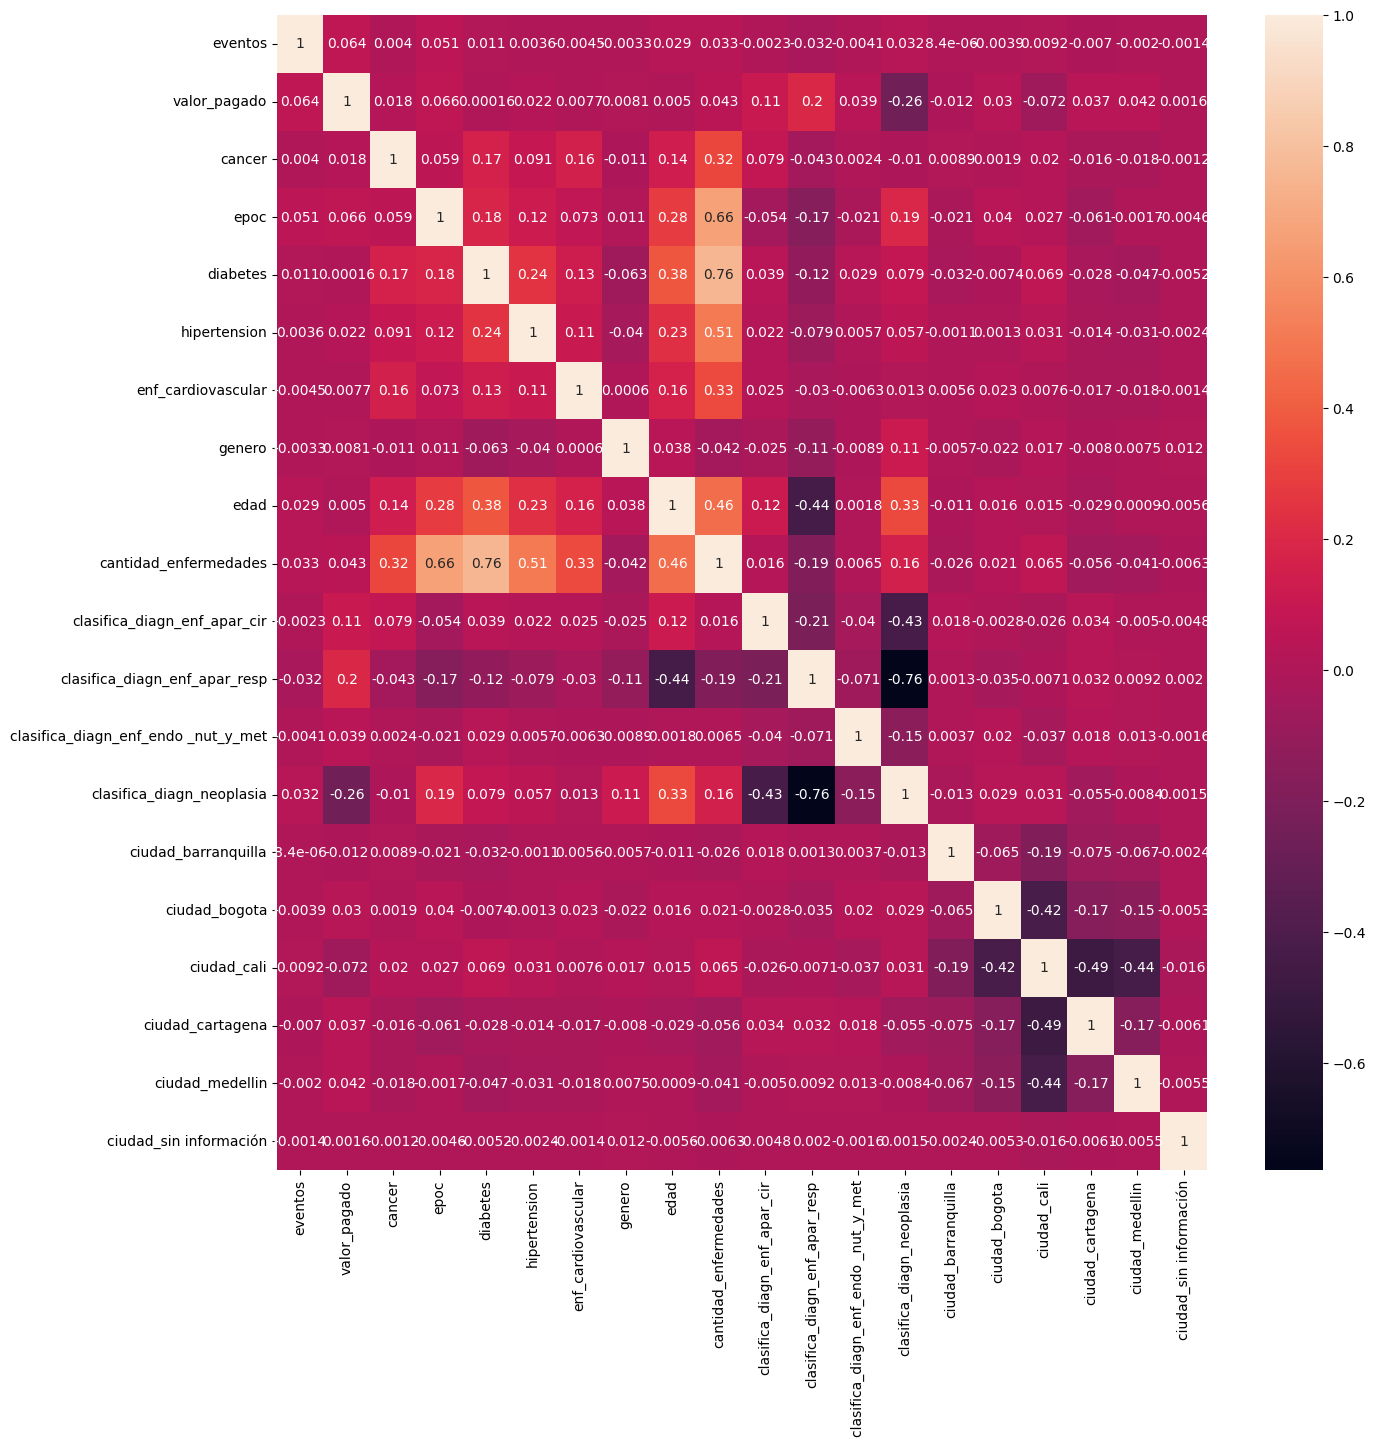

In [5]:
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(),annot= True)

In [12]:
#### las correlaciones mas altas

correlacion = df.corr().unstack().sort_values()
correlacion[correlacion<1].tail(15)

cancer                     cantidad_enfermedades        0.323077
clasifica_diagn_neoplasia  edad                         0.331396
edad                       clasifica_diagn_neoplasia    0.331396
cantidad_enfermedades      enf_cardiovascular           0.332371
enf_cardiovascular         cantidad_enfermedades        0.332371
diabetes                   edad                         0.375321
edad                       diabetes                     0.375321
cantidad_enfermedades      edad                         0.459997
edad                       cantidad_enfermedades        0.459997
hipertension               cantidad_enfermedades        0.508062
cantidad_enfermedades      hipertension                 0.508062
                           epoc                         0.662698
epoc                       cantidad_enfermedades        0.662698
diabetes                   cantidad_enfermedades        0.758752
cantidad_enfermedades      diabetes                     0.758752
dtype: float64





*  Existe una correlación positiva moderada (0.33) entre la edad de una persona y la clasificación de diagnóstico de neoplasia. Esto sugiere que, en general, a medida que la edad aumenta, también puede aumentar ligeramente la probabilidad de recibir un diagnóstico de neoplasia.

*   Hay una correlación positiva moderada (0.38) entre **la edad y la presencia de diabetes**. Esto sugiere que a medida que la edad aumenta, también aumenta la probabilidad de tener diabetes.

*  Existe una correlación positiva moderada a fuerte (0.46) entre **la edad de una persona y la cantidad de enfermedades** que tiene. Esto indica que a medida que una persona envejece, es más probable que desarrolle más enfermedades.

*   Hay una correlación positiva moderada a fuerte (0.51) entre **la cantidad de enfermedades que tiene una persona y la presencia de hipertensión**. Esto sugiere que las personas con más enfermedades tienen una mayor probabilidad de tener hipertensión y viceversa.

*  Existe una correlación positiva fuerte (0.66) entre la cantidad de enfermedades que tiene una persona y la presencia de EPOC (Enfermedad Pulmonar Obstructiva Crónica). Esto indica que las personas con más enfermedades tienen una mayor probabilidad de tener EPOC

*   Hay una correlación positiva fuerte (0.76) entre **la presencia de diabetes y la cantidad total de enfermedades** que tiene una persona. Esto sugiere que las personas con diabetes tienden a tener más enfermedades en comparación con aquellas que no tienen diabetes.






##SelectKBest

In [6]:
# Definir las características (X) y la variable objetivo (y)
y = df['valor_pagado']
X = df.drop('valor_pagado', axis=1)


# Si es un problema de clasificación
selector = SelectKBest(score_func=f_regression, k=10)  # Selecciona las 10 mejores características

# Si es un problema de regresión
# selector = SelectKBest(score_func=f_regression, k=10)

# Ajustar el selector a los datos
selector.fit(X, y)

# Obtener las columnas seleccionadas
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas:", selected_features)



Características seleccionadas: Index(['eventos', 'epoc', 'cantidad_enfermedades',
       'clasifica_diagn_enf_apar_cir', 'clasifica_diagn_enf_apar_resp',
       'clasifica_diagn_enf_endo _nut_y_met', 'clasifica_diagn_neoplasia',
       'ciudad_cali', 'ciudad_cartagena', 'ciudad_medellin'],
      dtype='object')


##Selector Lasso

In [7]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo LassoCV (cross-validated Lasso)
lasso = LassoCV(cv=5, random_state=0)  # cv=5 realiza validación cruzada de 5 pliegues
lasso.fit(X_scaled, y)

# Obtener las características seleccionadas
selected_features = X.columns[(lasso.coef_ != 0)]

print("Características seleccionadas por Lasso:", selected_features)

# Mostrar los coeficientes de las características
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(feature_importance[feature_importance['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False))

Características seleccionadas por Lasso: Index(['eventos', 'cancer', 'epoc', 'diabetes', 'hipertension',
       'enf_cardiovascular', 'genero', 'edad', 'clasifica_diagn_enf_apar_resp',
       'clasifica_diagn_enf_endo _nut_y_met', 'clasifica_diagn_neoplasia',
       'ciudad_barranquilla', 'ciudad_bogota', 'ciudad_cali',
       'ciudad_medellin'],
      dtype='object')
                                Feature    Coefficient
2                                  epoc  293925.868551
7                                  edad  267501.139431
0                               eventos  196502.982006
10        clasifica_diagn_enf_apar_resp  169167.842932
6                                genero  114580.357251
4                          hipertension   45725.361089
17                      ciudad_medellin   24469.658958
14                        ciudad_bogota   18980.404467
11  clasifica_diagn_enf_endo _nut_y_met    8019.276429
1                                cancer    7021.590383
5                    enf

Los coeficientes positivos indican una asociación positiva entre la característica y la variable de respuesta, mientras que los coeficientes negativos indican una asociación negativa.


*   Epoc (Enfermedad Pulmonar Obstructiva Crónica): Tiene el coeficiente más alto positivo, lo que significa que esta característica tiene la mayor influencia positiva en la variable de respuesta.

*   Edad: Es la segunda característica más importante, con un coeficiente positivo alto. Esto sugiere que la edad también tiene una fuerte influencia positiva en la variable de respuesta.

*   Eventos: También tiene un coeficiente positivo alto, lo que indica que esta característica tiene una influencia significativa en la variable de respuesta.

*  Género: Tiene un coeficiente positivo, lo que significa que el género también
está relacionado positivamente con la variable de respuesta, aunque en menor medida que las características anteriores.

*  Hipertensión, Ciudad de Medellín, Ciudad de Bogotá, Clasificación de diagnóstico de enfermedades endocrinas, nutricionales y metabólicas, y Cáncer: Todas estas características tienen coeficientes positivos, lo que indica que también tienen una influencia positiva en la variable de respuesta, pero menos que las características anteriores.


